### calculate $V_{\pi}$ in gridworld 5x5

Example 3.5

In [1]:
import numpy as np

nx,ny=5,5
A,A_=[0,1],[4,1]
B,B_=[0,3],[2,3]
actions=[[0,-1],[-1,0],[0,1],[1,0]]#left,up,right,down
pi=0.25
gm=0.9

def step(s,a):
    if s==A:
        return A_,10
    if s==B:
        return B_,5
    
    s_=[s[0]+a[0],s[1]+a[1]]
    if s_[0]<0 or s_[0]>=nx or s_[1]<0 or s_[1]>=ny:
        r=-1
        s_=s
    else:
        r=0
        
    return s_,r

V=np.zeros((nx,ny))

while True:
    V_=np.zeros_like(V)
    for x in range(nx):
        for y in range(ny):
            va=[]
            for a in actions:
                (x_,y_),r=step([x,y],a)
                va.append(pi*(r+gm*V[x_,y_]))
            V_[x,y]=np.sum(va)

    #print(np.around(V,decimals=2))
    if np.sum(np.abs(V-V_))<1e-4:
        print(np.around(V,decimals=1))
        break
    
    V=V_

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


### calculate $V_*$ in gridworld 5x5

Example 3.8

In [2]:
V=np.zeros((nx,ny))

while True:
    V_=np.zeros_like(V)
    for x in range(nx):
        for y in range(ny):
            va=[]
            for a in actions:
                (x_,y_),r=step([x,y],a)
                va.append(r+gm*V[x_,y_])
            V_[x,y]=np.max(va)

    #print(np.around(V,decimals=2))
    if np.sum(np.abs(V-V_))<1e-4:
        print(np.around(V,decimals=1))
        break
    
    V=V_

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


### calculate $V_k$ in gridworld 4x4

4.1 Policy Evaluation - Example 4.1

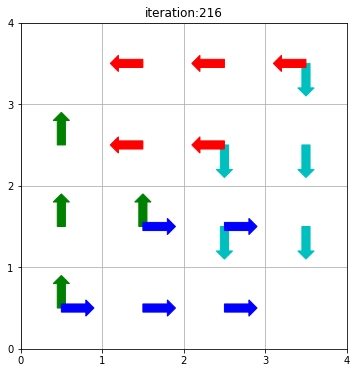

(array([[  0., -14., -20., -22.],
        [-14., -18., -20., -20.],
        [-20., -20., -18., -14.],
        [-22., -20., -14.,   0.]]),
 array([[ 0., -1., -1., -2.],
        [-1., -1., -2., -1.],
        [-1., -2., -2., -1.],
        [-2., -1., -1.,  0.]]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def is_terminal(s):
    return s==[0,0] or s==[nx-1,ny-1]

def step(s,a):
    if is_terminal(s):
        return s,0
    
    s_=[s[0]+a[0],s[1]+a[1]]
    
    if s_[0]<0 or s_[0]>=nx or s_[1]<0 or s_[1]>=ny:
        s_=s
        
    r=-1
    return s_,r

def plot_arrow(i,pi_op):
    scale=0.3
    x0=nx-0.5
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(1,1,1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(np.arange(0,nx+1,1))
    ax.set_yticks(np.arange(0,ny+1,1))
    plt.grid()
    plt.ylim((0,ny))
    plt.xlim((0,nx))
    
    for (x,y), label in pi_op.items():
        #print(x,y,label) 
        if [x,y]==[0,0] or [x,y]==[nx-1,ny-1]:
            pass
        else:  
            if 1 in label: #up
                plt.arrow(y+0.5,x0-x,0,scale,width=0.1, head_width=0.2, head_length=0.1,fc='g', ec='g')
            if 3 in label: #down
                plt.arrow(y+0.5,x0-x,0,-scale,width=0.1, head_width=0.2, head_length=0.1,fc='c', ec='c')
            if 2 in label: #right
                plt.arrow(y+0.5,x0-x,scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='b', ec='b')
            if 0 in label: #left
                plt.arrow(y+0.5,x0-x,-scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='r', ec='r')
            plt.title('iteration:'+str(i))
    
    plt.savefig('policy_at_iter_'+str(i)+'.png',dpi=350)
    plt.show()
    plt.close()

def calc_vk(k=217,pi=0.25,gm=1):
    
    global nx,ny,actions
    nx,ny=4,4
    actions=[[0,-1],[-1,0],[0,1],[1,0]] #left, up, right, down 
    
    V=np.zeros((nx,ny))
    pi_op={}
    
    for i in range(k):
        V_=np.zeros_like(V)

        for x in range(nx):
            for y in range(ny):
                v_a=[]
                for a in actions:
                    (x_,y_),r=step([x,y],a)
                    v_a.append(pi*(r+gm*V[x_,y_]))
                V_[x,y]=np.sum(v_a)    
                pi_op[x,y]=[i for i, v in enumerate(v_a) if v == max(v_a)]

        #convergence condition
        if np.sum(np.abs(V-V_))<1e-4:
            break

        V=V_
        
    plot_arrow(i,pi_op)
               
    return np.around(V,decimals=1),pi_op

def calc_v_op(k,pi_op):
    V=np.zeros((nx,ny))
    
    for i in range(k):
        V_=np.zeros_like(V)

        for x in range(nx):
            for y in range(ny):
                v_a,pi=[0]*4,[0]*4
                for ia,a in enumerate(actions):                
                    (x_,y_),r=step([x,y],a)            
                    pi[ia]=1 if ia in pi_op[x,y] else 0    
                    v_a[ia]=pi[ia]*(r+gm*V[x_,y_])
                V_[x,y]=np.sum(v_a)    
                

        #convergence condition
        if np.sum(np.abs(V-V_))<1e-4:
            break

        V=V_
        
    return V
    
        
V_pi,pi_op=calc_vk(k=217)

V_pi_=calc_v_op(k=1,pi_op=pi_op)

V_pi,V_pi_


### Blackjack implementation with gym

Example 5.1 first-visit monte carlo with the policy: hit until 20

In [326]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial

plt.style.use('ggplot')

In [327]:
env=gym.make('Blackjack-v1')

#policy: hit until reach 20
#actions: 0-stick, 1-hit

def sample_policy(s):
    
    player_card, _, _ = s  
    return 0 if player_card >= 20 else 1

def first_visit_mc(policy,env,n_eps,gm=1):
    
    ret_sum=defaultdict(float)
    ret_cnt=defaultdict(float)
    V=defaultdict(float)
    
    for ep in range(n_eps):
        s=env.reset()
        
        traj=[]
        done=False
        
        while not done:
            a=policy(s)
            s_,r,done,_=env.step(a)
            
            traj.append((s,a,r))     
            s=s_
            
        #get unique states
        ss=set([t[0] for t in traj])
        
        for i, s in enumerate(ss):
            
            #find first occurence of each unique state
            idx=traj.index([t for t in traj if t[0]==s][0])    
            
            #sum up all the discounted rewards starting from the first occurence
            Q=sum([t[2]*gm**i for t in traj[idx:]])
            
            ret_sum[s]+=Q
            ret_cnt[s]+=1.0
            V[s]=ret_sum[s]/ret_cnt[s]
        
    #print(ret_sum.values())
                     
    return V
                   
V_10000=first_visit_mc(sample_policy,env,n_eps=10000)
V_500000=first_visit_mc(sample_policy,env,n_eps=500000)
#print(V)
                   

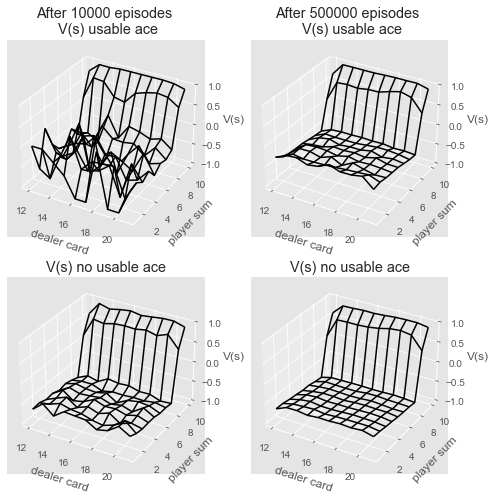

In [328]:
def plot_blackjack(V,ax1,ax2):
    player_sum=np.arange(12,21+1)
    dealer_show=np.arange(1,10+1)
    usable_ace=np.array([True,False])
    
    vs=np.zeros((len(player_sum),len(dealer_show),len(usable_ace)))
    
    for i, p in enumerate(player_sum):
        for j, d in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                vs[i,j,k]=V[p,d,ace]
                
    X,Y=np.meshgrid(player_sum,dealer_show)
    
    ax1.plot_wireframe(X,Y,vs[:,:,0])
    ax2.plot_wireframe(X,Y,vs[:,:,1])
    
    for ax in ax1,ax2:
        ax.set_zlim(-1,1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer card')
        ax.set_zlabel('V(s)')

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,8),subplot_kw={'projection': '3d'})

axes[0,0].set_title('After 10000 episodes \n V(s) usable ace')
axes[1,0].set_title('V(s) no usable ace')
axes[0,1].set_title('After 500000 episodes \n V(s) usable ace')
axes[1,1].set_title('V(s) no usable ace')
    
plot_blackjack(V_10000,axes[0,0],axes[1,0])
plot_blackjack(V_500000,axes[0,1],axes[1,1])

plt.savefig('blackjack_fvmc.png',dpi=350)      



Monte Carlo with Exploration Start

In [346]:
def mc_es(env,n_eps,gm=1.0):
    
    ret_sum=defaultdict(float)
    ret_cnt=defaultdict(float)
    
    na=env.action_space.n
    Q=defaultdict(lambda: np.zeros(na))
    
    for ep in range(n_eps):
        traj,done=[],False
        s=env.reset() #random initial state
        a=np.random.randint(na) #random initial action
        
        for i in range(100):
            
            if i==0:
                pass
            else:
                a=np.random.choice([a for a,q in enumerate(Q[s]) if q==np.max(Q[s])])
           
            s_,r,done,_ = env.step(a)
            traj.append((s,a,r))
            
            if done:
                break
                
            s=s_
        
        # find the unique state-action pairs
        pairs = set([(t[0],t[1]) for t in traj])
        
        for (s,a) in pairs:
            
            pair = (s,a)
            # find the first occurence of each state-action pair
            idx = traj.index([t for t in traj if t[0] == s and t[1] == a][0])
            V = sum([t[2]*gm**i for i, t in enumerate(traj[idx:])])
            
            ret_sum[pair]+= V
            ret_cnt[pair]+= 1.
            
            Q[s][a]=ret_sum[pair]/ret_cnt[pair]
    
    V=defaultdict(float)
    for s, a_s in Q.items():
        V[s]=np.max(a_s)
    return Q,V

Q,V=mc_es(env,n_eps=500000)

fig,axes=plt.subplots(ncols=2,figsize=(10,10),subplot_kw={'projection': '3d'})

axes[0].set_title('After 500000 episodes \n V(s) usable ace')
axes[1].set_title('After 500000 episodes \n V(s) no usable ace')
    
plot_blackjack(V,axes[0],axes[1])
plt.savefig('blackjack_mces.png',dpi=350)  

TypeError: 'float' object does not support item assignment

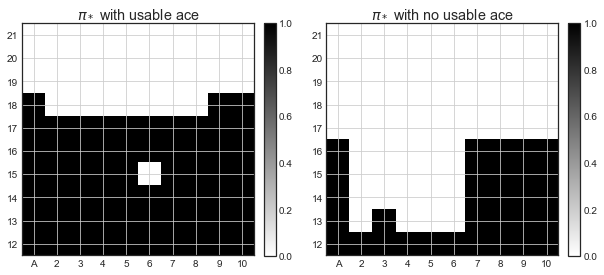

In [345]:
def plot_policy(Q):

    player_sum=np.arange(21,11,-1)
    dealer_show=np.arange(1,10+1)

    X,Y=np.meshgrid(dealer_show,player_sum)

    pi_ace=np.zeros((len(dealer_show),len(player_sum)))
    pi_noace=np.zeros((len(dealer_show),len(player_sum)))

    for (p,d,ace),q in Q.items():
        if ace==1:
            pi_ace[21-p,d-1]=np.argmax(q)
        elif ace==0 and p>11:
            pi_noace[21-p,d-1]=np.argmax(q)

    plt.style.use('seaborn-white')

    fig=plt.figure(figsize=(10,6))
    x_ticks_labels = ['A','2','3','4','5','6','7','8','9','10','11']
    y_ticks_labels = ['21','20','19','18','17','16','15','14','13','12','11'] 

    ax1=fig.add_subplot(1,2,1)
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_xticks(np.arange(0,11,1))
    ax1.set_yticks(np.arange(0,11,1))
    ax1.set_xticklabels(x_ticks_labels)
    ax1.set_yticklabels(y_ticks_labels)
    plt.grid()
    im=plt.imshow(pi_ace,cmap='gray_r')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.title('$\pi_*$ usable ace')

    ax2=fig.add_subplot(1,2,2)
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_xticks(np.arange(0,11,1))
    ax2.set_yticks(np.arange(0,11,1))
    ax2.set_xticklabels(x_ticks_labels)
    ax2.set_yticklabels(y_ticks_labels)
    plt.grid()
    im=plt.imshow(pi_noace,cmap='gray_r')
    #plt.colorbar()
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.title('$\pi_*$ no usable ace')
    
plot_policy(Q)
plt.savefig('blackjack_pi_mces.png',dpi=350)

In [325]:
env.action_space.n

2

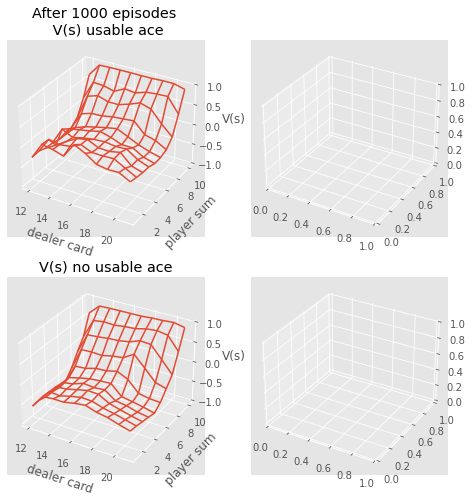

In [75]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    '''
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    '''
    def policy_fn(observation):
        # Implement this!
        props = np.ones(nA, dtype = float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        props[best_action] += 1. - epsilon
        return props
        
    return policy_fn

def mc_control_epsilon_greedy(env, num_episodes, discount_factor = 1.0, epsilon = 0.1):
    '''
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    '''
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # Implement this!
    for i_episode in range(num_episodes):
        observation = env.reset()
        #observation=(np.random.choice(range(12,22)),
        #             np.random.choice(range(1,11)),
        #             bool(np.random.choice([0,1])))
        action=np.random.randint(2)
        
        episodes = []
        for i in range(100):
            #props = policy(observation)
            #action = np.random.choice(np.arange(len(props)), p = props)
            if i==0:
                pass
            else:
                action = np.random.choice([a for a,q in enumerate(Q[observation]) if q==np.max(Q[observation])])
            #action = np.argmax(Q[observation])
            next_observation, reward, done, _ = env.step(action)
            episodes.append((observation, action, reward))
            
            if done:
                break
            observation = next_observation
        
        # find the unique observation
        pairs = set([(episode[0], episode[1]) for episode in episodes])
        for (observation, action) in pairs:
            pair = (observation, action)
            # find the first occurence of the observation
            idx = episodes.index([episode for episode in episodes if episode[0] == observation and episode[1] == action][0])
            V = sum([reward[2] * discount_factor ** i for i, reward in enumerate(episodes[idx:])])
            
            returns_sum[pair] += V
            returns_count[pair] += 1.
            
            Q[observation][action] = returns_sum[pair] / returns_count[pair]
    
    return Q, policy

Q, policy = mc_control_epsilon_greedy(env, num_episodes = 500000, epsilon = 0.1)

# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
    
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,8),subplot_kw={'projection': '3d'})

axes[0,0].set_title('After 1000 episodes \n V(s) usable ace')
axes[1,0].set_title('V(s) no usable ace')
#axes[0,1].set_title('After 500000 episodes \n V(s) usable ace')
#axes[1,1].set_title('V(s) no usable ace')
    
plot_blackjack(V,axes[0,0],axes[1,0])

In [85]:
q_ace=[q0 for q0,q1 in Q.values()]
q_noace=[q1 for q0,q1 in Q.values()]

In [119]:
Q.items()

p=[p for (p,d,ace) in Q.keys()]
d=[d for (p,d,ace) in Q.keys()]
ace=[ace for (p,d,ace) in Q.keys()]

#a=[a for a,q in enumerate(Q.values()) if q(a)==max(Q.values())]
a=[np.argmax(q) for q in Q.values()]

a_ace=[np.argmax(q) for (p,d,ace),q in Q.items() if ace==1]
a_noace=[np.argmax(q) for (p,d,ace),q in Q.items() if ace==0]

p_ace=[p for (p,d,ace),q in Q.items() if ace==1]
p_noace=[p for (p,d,ace),q in Q.items() if ace==0]
d_ace=[d for (p,d,ace),q in Q.items() if ace==1]
d_noace=[d for (p,d,ace),q in Q.items() if ace==0]

V_ace=[max(q) for (p,d,ace),q in Q.items() if ace==1]
V_noace=[max(q) for (p,d,ace),q in Q.items() if ace==0]

p_ace,d_ace

In [120]:
np.flipud(a_ace)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

(10, 10)


(9, 5)

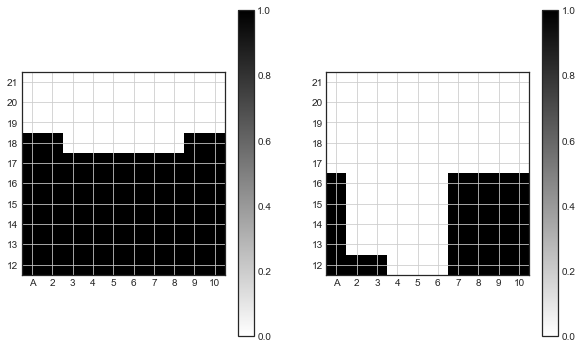

In [304]:
x = np.arange(-3.0, 3.0, 0.05)
y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)

#plt.imshow(X)

player_sum=np.arange(21,11,-1)
dealer_show=np.arange(1,10+1)

X,Y=np.meshgrid(dealer_show,player_sum)

#print(Y)
z_ace=np.zeros((len(dealer_show),len(player_sum)))
z_noace=np.zeros((len(dealer_show),len(player_sum)))

for (p,d,ace),q in Q.items():
    if ace==1:
        #print(max(q))
        
        #print(p,d)
        
        z_ace[21-p,d-1]=np.argmax(q)
    else:
        if p>11:
            z_noace[21-p,d-1]=np.argmax(q)

#z[0,9]=1
#z[d-1,p-12]=1
#z

#plt.xticks(labels=range(1,11))
#locs, labels = plt.xticks() 
#plt.xticks(np.arange(1, 11, step=1))  
#plt.yticks(np.arange(12, 22, step=1))  
#plt.gird()
#plt.grid()xticks(ticks=None, labels=None, **kwargs)[source]¶
plt.style.use('seaborn-white')

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,2,1)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,11,1))
x_ticks_labels = ['A','2','3','4','5','6','7','8','9','10','11']
y_ticks_labels = ['21','20','19','18','17','16','15','14','13','12','11'] 
ax.set_xticklabels(x_ticks_labels)
ax.set_yticklabels(y_ticks_labels)
#ax.set_yticklabels(np.arange(21,10,1))
plt.grid()
#plt.ylim((0,10))
#plt.xlim((0,nx))
plt.imshow(z_ace,cmap='gray_r')
plt.colorbar()

ax=fig.add_subplot(1,2,2)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,11,1))
x_ticks_labels = ['A','2','3','4','5','6','7','8','9','10','11']
y_ticks_labels = ['21','20','19','18','17','16','15','14','13','12','11'] 
ax.set_xticklabels(x_ticks_labels)
ax.set_yticklabels(y_ticks_labels)
#ax.set_yticklabels(np.arange(21,10,1))
plt.grid()
#plt.ylim((0,10))
#plt.xlim((0,nx))
plt.imshow(z_noace,cmap='gray_r')
plt.colorbar()

X,Y

z=np.zeros((len(dealer_show),len(player_sum)))
z[0,1]=1
z

x = np.arange(2,10,2)
y = x.copy()
x_ticks_labels = ['jan','feb','mar','apr','may']

np.arange(0,11,1)

z_ace=np.zeros((len(dealer_show),len(player_sum)))

print(z_ace.shape)

z_ace[9,5]=1

21-12,6-1


In [197]:
X,Y

(array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 array([[21, 21, 21, 21, 21, 21, 21, 21, 21, 21],
        [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [19, 19, 19, 19, 19, 19, 19, 19, 19, 19],
        [18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
        [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
        [16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
        [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
        [14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
        [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
        [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [57]:
for i in range(100):
    s=(np.random.choice(range(12,22)),
       np.random.choice(range(1,11)),
       bool(np.random.choice([0,1])))
    
    print(s)

(13, 9, True)
(12, 1, True)
(14, 8, False)
(18, 10, False)
(21, 3, True)
(16, 5, False)
(15, 9, True)
(17, 10, True)
(12, 6, True)
(13, 3, True)
(19, 1, True)
(15, 5, False)
(20, 1, False)
(19, 3, True)
(17, 1, True)
(14, 5, True)
(12, 6, True)
(16, 6, False)
(14, 1, True)
(21, 7, True)
(13, 1, False)
(12, 8, False)
(15, 4, True)
(15, 6, True)
(12, 9, True)
(15, 8, False)
(14, 1, False)
(16, 9, False)
(18, 4, True)
(19, 4, True)
(14, 1, True)
(18, 9, False)
(12, 3, False)
(13, 7, False)
(20, 4, True)
(12, 3, False)
(14, 6, True)
(21, 1, False)
(17, 10, False)
(15, 2, False)
(12, 8, False)
(18, 6, True)
(16, 9, True)
(14, 7, False)
(15, 6, True)
(12, 5, True)
(15, 8, True)
(14, 9, False)
(13, 4, False)
(12, 3, True)
(18, 5, True)
(15, 3, True)
(15, 4, True)
(21, 2, True)
(19, 5, False)
(17, 8, True)
(19, 1, False)
(20, 3, False)
(14, 5, False)
(15, 1, False)
(16, 1, False)
(14, 6, False)
(19, 5, False)
(14, 4, False)
(17, 10, False)
(14, 3, True)
(18, 1, False)
(18, 7, True)
(18, 7, Tru